<h1>Brazillian Pre-Electoral Scenario on Twitter, 2017</h1>
<h4>Ilan Grynszpan - gryn0002 - 2177431 and Debra Legge - legg0007 - 9300908</h4>

**index:**
    
    1. Background
    2. Setup
    3. Collecting and analyzing data
    4. Conclusions
    5. References

*1. Background*

Brazil is holding its general elections in 2018. Among the top positions to be decided, the country is choosing a new president. Latest polls have put in top positions candidates Lula, João Doria, Geraldo Alckmin, Marina Silva, Jair Bolsonaro and Ciro Gomes. This project's goal is to analyze how those six profiles are acting on their Facebook pages and make a profile and network analysis of their followers. Since Brazil holds a two-round majority election system for the presidency, this project has a great potential on defining what kind of aliances and marketing focus candidates teams should be using on elections. Since modern elections are essencially a marketing job, the possible results hereby involved have a likely application on other kind of marketing purposes. 

Among the questions answered in this report, should be found:

1. How many followers each page has? Does the relative position of each contender match their position on electoral polls?

2. If the number of followers of each candidate does not match their relative place in current polls, what could justify that?

3. Do the user tweet reactions to each candidate match their popularity as analyzed by traditional polling?

4. From what has been seen, can we conclude that Twitter analysis provides a good and reliable way to test pre-electoral candidate popularity in Brazil?

*Methodology:*

Those researches have been analyzed by several institutes not having candidates from a same political party togheter, as parties like PSDB and PT (usual runoff contenders) have not yet decided their candidates. 

Lula is still runing as Workers' Party candidate. His candidacy might be judicially overturned, though, should an appealing Federal Court find him guilty for his role on the investigation on progress within the scope of the CarWash Operation (FORBES, 2017). In this case, Workers' Party (the country's main leftist organization and a presidential runoff contender since 1989) will be choosing a replacement name.

On the other side of the dispute, the liberal-conservative coalition led by the Social Democracy Party (PSDB) is still devided among the governor of Sao Paulo Geraldo Alckmin, and, the Sao Paulo city mayor Joao Doria as who should be their candidate. The decision is due the next December, when party national conventions are to be held, prior to the offical campaign starting.

Because of the main party's splits and judicial issues, polls have been conducted alternating cenarios (usually one with Geraldo Alckmin as the PSDB candidate, and, one with Joao doria filling that space).

This report will be using recent polls provided by web domain DataPoder360, from September 2017 (https://www.poder360.com.br/datapoder360/lula-alckmin-e-doria-tem-recuos-bolsonaro-se-mantem-diz-datapoder360/), to match Twitter minning results with perceived polling scenario. According to this polls, the current polling results, put into a time series, were:

Scenario 1 (Alckmin as PSDB candidate:

<img src="pesq_alckmin_dp.png"/>

Scenario 2 (Doria as PSDB candidate):

<img src="pesq_doria_dp.png"/>


**It is important to emphasize that several political analists have been pointing that electoral polling one year prior to the elections usually tell more about each candidate's relativ popularity, in relation to their contenders, than about actual numbers. Since the official campaign has not yet started, following Brazilian electoral law requirements, the ultimate goal of this report is showing if Twitter could be succesfully used as an electoral termometer for political popularity, and, as such, be used for analysis and political action by involved parties and supporting groups, with allocation of eletoral resources hereby related.**

*2. Setup*


In [1]:
## Code inspired by the book Minning the Social Web, 2nd edition, by Matthew Russell 
## (O'Reilly Media, 2013). Example 1, can be found in Chapter 1:
## "Mining Twitter: Exploring Trending Topics, Discovering What People Are Talking About, 
## and More"

import datetime
import time
import tweepy
import pandas as pd
import numpy as np

# getting an access token for the applicaiton

# Keys are the author's private property, the author reccomends the reading of the previously 
# mentioned inspiration book to get the refered keys that this code requires.
# Personal access keys must be used as the ones below are the author's private property.

import twitter

CONSUMER_KEY = 'aPLNhaa5fDTJ444wVE9g8vqUc'
CONSUMER_SECRET = 'PCLwYo3ojwPjIUZEhEttkHwxo15A6ucI67GAsEsKVH1Q3KwtSf'
OAUTH_TOKEN = '886860462-X9hCYZtquPJPgB6Ce1sozpf3aBllkrssLCMzFVXJ'
OAUTH_TOKEN_SECRET = '8U6ddkbE6xEvA9UOy4WSDe8CA8OxWNJJm03QKJjWPIckR'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

#api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

#tw = api.me()


api = tweepy.API(auth)

print api

*3. Collecting and Analyzing Data*

Getting the pages for each candidate:

In [2]:
# Using library Tweepy, Copyright 2009, Joshua Roesslein. Revision 920f5c49. Docs can be found in:
# http://tweepy.readthedocs.io/en/v3.5.0/

user = api.get_user("twitter")

jb_user = api.get_user('jairbolsonaro')
print jb_user.screen_name

lula_user = api.get_user('lulapelobrasil')
print lula_user.screen_name

ga_user = api.get_user('geraldoalckmin_')
print ga_user.screen_name

ms_user = api.get_user('silva_marina')
print ms_user.screen_name

jd_user = api.get_user('jdoriajr')
print jd_user.screen_name

cg_user = api.get_user('cirogomes')
print cg_user.screen_name

jairbolsonaro
LulapeloBrasil
geraldoalckmin_
silva_marina
jdoriajr
cirogomes


1. How many followers each page has? Does the relative position of each contender match their position on electoral polls?

In [4]:
print "Jair Bolsonaro(PSC) -> " + str(jb_user.followers_count)
print "Lula(PT) -> " + str(lula_user.followers_count)
print "Geraldo Alckmin(PSDB) -> " + str(ga_user.followers_count)
print "Marina Silva(Rede) -> " + str(ms_user.followers_count)
print "Joao Doria(PSDB) -> " + str(jd_user.followers_count)
print "Ciro Gomes(PDT) -> " + str(cg_user.followers_count)

followers_data = [["Jair Bolsonaro(PSC)", jb_user.followers_count],
                 ["Lula(PT)", lula_user.followers_count],
                 ["Geraldo Alckmin(PSDB)", ga_user.followers_count],
                 ["Marina Silva(Rede)", ms_user.followers_count],
                 ["Joao Doria(PSDB)", jd_user.followers_count],
                 ["Ciro Gomes(PDT)", cg_user.followers_count]]

Jair Bolsonaro(PSC) -> 618547
Lula(PT) -> 153135
Geraldo Alckmin(PSDB) -> 860395
Marina Silva(Rede) -> 1799845
Joao Doria(PSDB) -> 666089
Ciro Gomes(PDT) -> 75766


In [5]:
## using pandas.DataFrame to organize and analyze collected data. More information can be found at 
## https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm

twitter_follow_table = pd.DataFrame(followers_data, columns=["Candidate", "Followers"])
twitter_follow_table = twitter_follow_table.sort_values("Followers")
print twitter_follow_table

               Candidate  Followers
5        Ciro Gomes(PDT)      75766
1               Lula(PT)     153135
0    Jair Bolsonaro(PSC)     618547
4       Joao Doria(PSDB)     666089
2  Geraldo Alckmin(PSDB)     860395
3     Marina Silva(Rede)    1799845


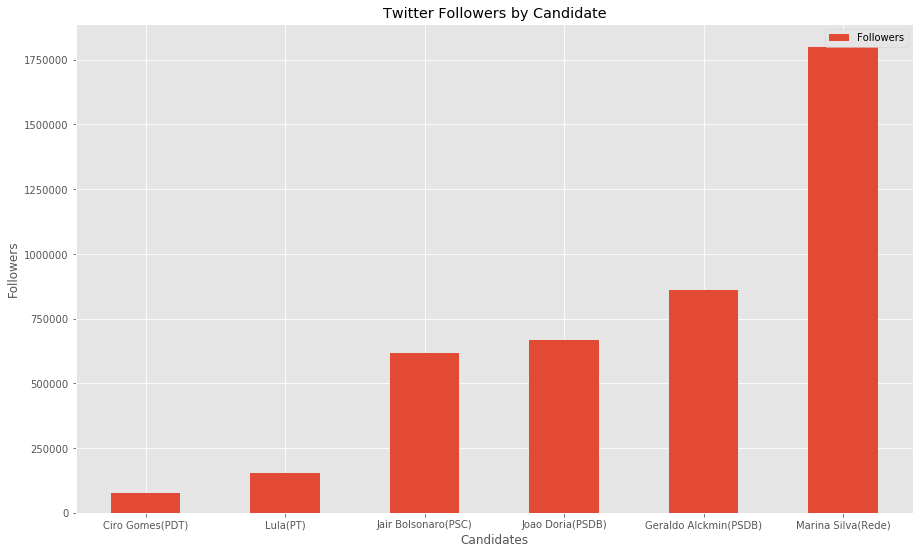

In [6]:
# inspiration from the code found in 
# http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html

plt.style.use('ggplot')

# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 15 and height to 9
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

df_plot = twitter_follow_table.plot(kind='bar')

# Set Labels

df_plot.set_xlabel("Candidates")
df_plot.set_ylabel("Followers")
df_plot.set_title("Twitter Followers by Candidate")

df_plot.set_xticklabels(twitter_follow_table["Candidate"], rotation=0)
plt.show()

As we can realize, the results from Twitter followers absolute counting is not matching poll reality. Potential candidate Marina Silva(Rede), although having a record number of Twitter followers, polls in the last places on every scenario. This might happen for a few reasons:

1. Twitter does not represent Brazilian reality accurately
2. Twitter is very limited to a selected group of the Brazilian society
3. Candidates such as Marina Silva, who have ran on the last(2014) general elections, have a recent social networking recall, and, therefore, have managed to keep followers. This would not represent the electoral scenario, though.

In order to analyze the possible occurence of the third scenario, we will now analyze each candidate's increase on their sum of like and retweets. On the previously analyzed period (April/2017 to September/2017).

In [7]:
# Using tweet extraction method defined by user ZdaR in 
# https://stackoverflow.com/questions/30362651/getting-tweets-by-date-with-tweepy

tweets_lula = api.user_timeline(screen_name = lula_user.screen_name, count = 1000, include_rts = True)
tweets_jb = api.user_timeline(screen_name = jb_user.screen_name, count = 1000, include_rts = True)
tweets_ms = api.user_timeline(screen_name = ms_user.screen_name, count = 1000, include_rts = True)
tweets_ga = api.user_timeline(screen_name = ga_user.screen_name, count = 1000, include_rts = True)
tweets_jd = api.user_timeline(screen_name = jd_user.screen_name, count = 1000, include_rts = True)

def fav_counter(profile, api):
    
    # function developed by Ilan Grynszpan(2017)
    # Method: Counts favorites by day for a specific Twitter profile and returns a Python Dict
    
    if profile is None:
        print "unable to perform operation on unexistent user"
        return None
    
    tweets = api.user_timeline(screen_name = profile.screen_name, 
                               count = 1000, 
                               include_rts = True)
    fav_count = {}
    
    
    for tweet in tweets:
    
        if not tweet.created_at.day in fav_count.keys():
            fav_count[tweet.created_at.day] = tweet.favorite_count 
        else:
            fav_count[tweet.created_at.day] += tweet.favorite_count
    
    return fav_count


In [8]:
users = [lula_user, jb_user, jd_user, ga_user, ms_user, cg_user]

fav_users = [fav_counter(i,api) for i in users]
fav_subs = ["Lula", "Bolsonaro", "Doria", "Alckmin", "Marina", "Gomes"]


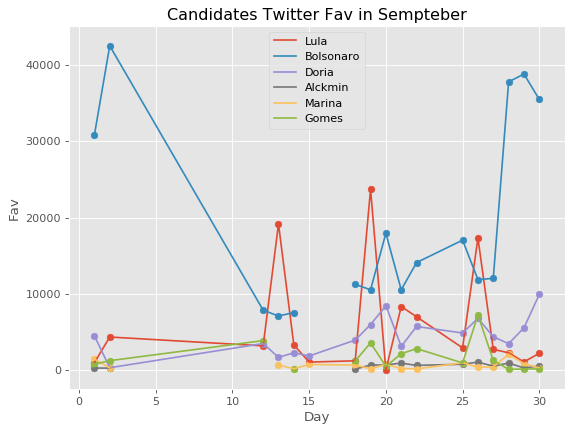

In [14]:
plt.style.use('ggplot')

# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

k_vals = []
v_vals = [[],[],[],[],[],[]]

for k in fav_counter(lula_user,api).keys():
    k_vals.append(k)
    
    for i in range(0,6):
        v_vals[i].append(fav_users[i].get(k))

for i in range(0,6):
    
    plt.plot(k_vals, v_vals[i], label = fav_subs[i])
    plt.scatter(k_vals, v_vals[i])

plt.title("Candidates Twitter Fav in Sempteber")
plt.xlabel("Day")
plt.ylabel("Fav")
plt.legend(fav_subs)
plt.show()

*4. Observations*

Now, the favorite count for Tweets is matching the numbers found on the polls: Lula(PT) and Bolsonaro(PSC) are leading, while Marina(Rede) is not having a very large number of favorites. This result leads us to a couple of conclusions:

1. The previously described scenario 3, in which a candidate's followers from a past elections do not subscribe seems to be true. This means that good results candidates from recent elections (like Marina Silva(third place in 2014)) would be expecting to have a larger number of followers than newer names (like Doria, who just enetered politics in 2016) or Bolsonaro (who, besides being a politician for a longer time, has never run as a presidential candidate before).
2. Twitter analysis provides a useful source of information for candidates popularity in Brazil, but, it must be done as a time series Twit analysis, which will provide information on which candidate interactions are actually being followed by users. As such, if simple followers count does not tell us much about scenario, or, worst, can mislead us, Retweet and Favorites on Tweets, along time, allied with electoral polling, could potentially provide a cheaper and succesful way of matching accurate results.

*5. further observations*

Having those conclusions in mind, there are a few more questions that should interest us regarding the use of Twitter by the candidates. 

1. How big is the penetration of Twitter within the Brazilian society?
2. Does a candidate's party structure size link to their Twitter performance?
3. How well are the canidate's Twitter reactions distributed within the different regions of the country?

The first question can be fairly answered looking at the 2016 final quarter data obtained by the web domain *statista* (STATISTA 2016). The results adquired have placed Twitter in the 7th position, at that time, in the most used social networking ranking. This means 36% of the mapped Brazilian population was, at the time, a Twitter user, whilst the First social media, Youtube, had a 63% rate. Despite being a smaller position, recent events like the 2013 demonstrations have made it clear how important the social networking platform is for social movements in the country (SPIRO MONROY-HERNÁNDEZ, E. A. 2013).

<img src = "social_net_br_16.png"/>

The second question we wish to answer is how does a candidate's party performance relate to their performance on Twitter.

The simplest way to answer this question is to correlate

*5. further observations*

Knowing that Twitter is an intereseting tool to be investigated on the scope of Brazilian electoral scenarios, we should proceed to analyzing how this usage is distributed within the country.

Looking at the same scenario previously analyzed by candidate, now we are interested in the location of each candidate's followers.

In [110]:
## first we have to create a method to verify if any of the Brazilian capitals is contained in a tweet location

## since Brazilian cities use portuguesee names, it is important to deal with Python encoding issues, therefore,
## a good solution is to replace any non-ascii (0 to 128 code) character, using the function "remove_non_ascii_2"
## found on https://stackoverflow.com/questions/20078816/replace-non-ascii-characters-with-a-single-space

import re

def remove_non_ascii_2(text):

    return ''.join([i if ord(i) < 128 else 'x' for i in text])

def findCapital(value):
    
    capitals = ['rio de janeiro', 'sxo paulo', 'belo horizonte', 'vitxria', 'porto alegre', 'florianxpolis', 
                'curitiba', 'campo grande', 'cuiabx', 'goixnia', 'brasxlia', 'palmas', 'porto velho',
               'salvador', 'aracajx', 'maceix', 'joxo pessoa', 'recife', 'natal', 'macapx', 'manaus',
               'belxm', 'rio branco', 'sxo luxs', 'teresina', 'boa vista']
    
    for cap in capitals:
        
        if re.match(cap, value):
            return cap
    
    return 'not found'

In [150]:


def hashtag_by_capitals(htg, lim):
    
    loc = {}
    loc_vec = []
    
    capitals = ['rio de janeiro', 'sxo paulo', 'belo horizonte', 'vitxria', 'porto alegre', 'florianxpolis', 
                'curitiba', 'campo grande', 'cuiabx', 'goixnia', 'brasxlia', 'palmas', 'porto velho',
               'salvador', 'aracajx', 'maceix', 'joxo pessoa', 'recife', 'natal', 'macapx', 'manaus',
               'belxm', 'rio branco', 'sxo luxs', 'teresina', 'boa vista']
        
    for cap in capitals:
        loc[cap] = 0

    for res in tweepy.Cursor(api.search, q=htg).items(lim):
    
        user_loc = res.user.location
    
        user_loc = remove_non_ascii_2(user_loc)
        user_loc = user_loc.encode('latin-1')
        
        loc_found =  findCapital(user_loc.lower())
    
        if loc_found in loc.keys() and loc_found != "not found":
            loc[loc_found] += 1
    
    return loc

In [151]:
lula_caps = hashtag_by_capitals('#lula2018', 200)
bolso_caps = hashtag_by_capitals('#bolsonaro2018', 200)
doria_caps = hashtag_by_capitals('#doria2018', 200)

In [170]:
# making a data frame out of the results

capitals = ['rio de janeiro', 'sxo paulo', 'belo horizonte', 'vitxria', 'porto alegre', 'florianxpolis', 
                'curitiba', 'campo grande', 'cuiabx', 'goixnia', 'brasxlia', 'palmas', 'porto velho',
               'salvador', 'aracajx', 'maceix', 'joxo pessoa', 'recife', 'natal', 'macapx', 'manaus',
               'belxm', 'rio branco', 'sxo luxs', 'teresina', 'boa vista']

states = ['RJ', 'SP', 'MG', 'ES', 'RS', 'SC', 'PR', 'MS', 'MT', 'GO', 'DF', 'TO', 'RO',
               'BA', 'SE', 'AL', 'PB', 'PE', 'RN', 'AP', 'AM',
               'PA', 'AC', 'MA', 'PI', 'RR']

caps_data = []

i = 0
for cap in capitals:
    caps_data.append([cap, states[i], lula_caps[cap], bolso_caps[cap], doria_caps[cap]])
    i+=1

caps_table = pd.DataFrame(caps_data, columns=["Capital", "State", "Lula", "Bolsonaro", "Doria"])
print caps_table

caps_table.to_csv("hashtag_by_cap.csv", sep=';', encoding='utf-8')

           Capital State  Lula  Bolsonaro  Doria
0   rio de janeiro    RJ    14         10     11
1        sxo paulo    SP    14         12      1
2   belo horizonte    MG     4          5      0
3          vitxria    ES     1          0      0
4     porto alegre    RS     3          2      0
5    florianxpolis    SC     0          0      0
6         curitiba    PR     2          2      0
7     campo grande    MS     0          0      0
8           cuiabx    MT     0          1      0
9          goixnia    GO     1          3      0
10        brasxlia    DF     3          8      0
11          palmas    TO     1          0      0
12     porto velho    RO     0          0      0
13        salvador    BA     7          0      0
14         aracajx    SE     0          0      0
15          maceix    AL     0          1      0
16     joxo pessoa    PB     0          0      0
17          recife    PE     2          5      0
18           natal    RN     2          0      0
19          macapx  

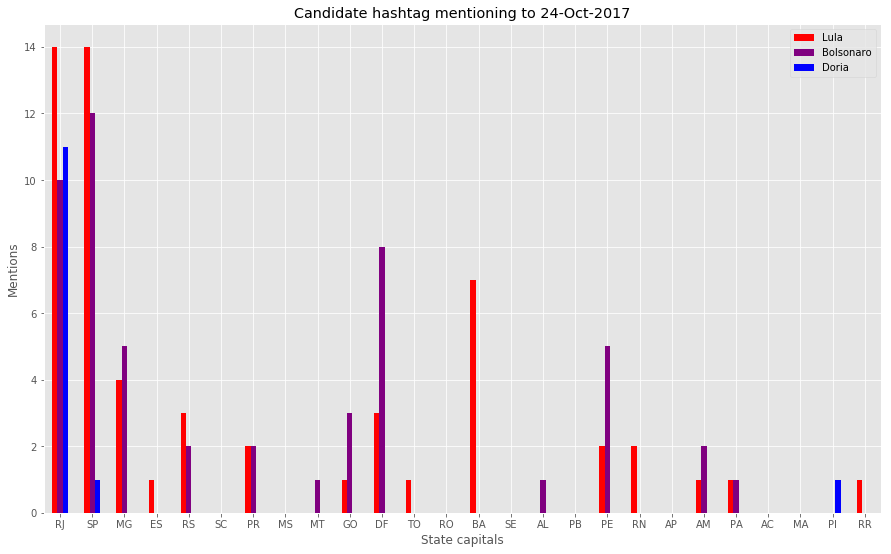

In [171]:
# inspiration from the code found in 
# http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html

plt.style.use('ggplot')

# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 15 and height to 9
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

colors = ['red', 'purple', 'blue']

df_plot = caps_table.plot(kind='bar', color = colors)

# Set Labels

df_plot.set_xlabel("State capitals")
df_plot.set_ylabel("Mentions")
df_plot.set_title("Candidate hashtag mentioning to 24-Oct-2017")


df_plot.set_xticklabels(caps_table["State"], rotation=0)
plt.show()

We can follow the candidate's performance on the state capitals using the following maps, built on RStudio, representing, left to right, the performance of candidates Doria, Bolsonaro and Lula.

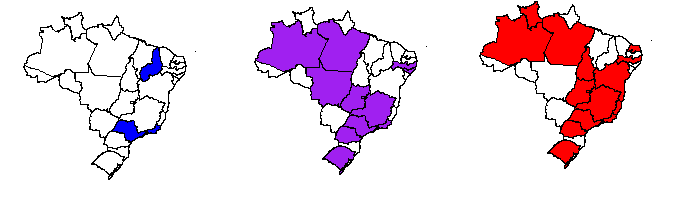

**REFERENCES:**

DataPoder260, *Lula, Alckmin e Doria têm recuos; Bolsonaro se mantém, diz DataPoder360* (eng: "Lula, Alckmin and Doria fall back, Bolsonaro keeps steady, says DataPoder360"). Source: https://www.poder360.com.br/datapoder360/lula-alckmin-e-doria-tem-recuos-bolsonaro-se-mantem-diz-datapoder360/ 

Russell, M 2013, *Mining the Social Web, 2nd Edition*, chapter 1: Mining Twitter: Exploring Trending Topics, Discovering What People Are Talking About, and More. Publisher: O'Reilly Media

Tweepy, Copyright 2009, Joshua Roesslein. Revision 920f5c49, as seen in http://tweepy.readthedocs.io/en/v3.5.0/

*The Top Five Politicians Likely To Be Elected Brazil's President In 2018*, published in Forbes online article by Keneth Rapoza on August 14, 2017. Online article: https://www.forbes.com/sites/kenrapoza/2017/08/14/the-top-five-politicians-likely-to-be-elected-brazils-president-in-2018/#6bc0166f722e

DOTANCOHEN, M. P. 2013. Replace non-ASCII characters with a single space [Online]. Available: https://stackoverflow.com/questions/20078816/replace-non-ascii-characters-with-a-single-space [Accessed].

STATISTA. 2016. Penetration of leading social networks in Brazil as of 4th quarter 2016 [Online]. Available: https://www.statista.com/statistics/284424/brazil-social-network-penetration/ [Accessed].

SPIRO MONROY-HERNÁNDEZ, E. A. 2013. How Brazilian protesters are using Twitter [Online]. Available: https://www.theguardian.com/news/datablog/2013/jul/04/brazilian-protesters-twitter-microsoft [Accessed].


Shapefiles used of Brazilian borders used from http://www.codegeo.com.br/2013/04/shapefiles-do-brasil-para-download.html